In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Observing and cleaning the data

In [2]:
data = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [5]:
# removing row with "Other" gender
data = data.drop(data[data['gender']=='Other'].index)

In [6]:
data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [7]:
# counting rows with null values in it
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# calculating average bmi (mean)
print(data['bmi'].mean())

28.894559902200488


In [9]:
# filling null values in bmi column with the bmi mean
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

In [10]:
# checking for nulls again
data['bmi'].isnull().sum()

0

In [11]:
# creating new dataframe with stroke and no stroke counts (0 = no stroke, 1 = stroke)
stroke_count_df = pd.DataFrame(data.groupby('stroke')['stroke'].count())
stroke_count_df

,stroke
stroke,
0,4860
1,249


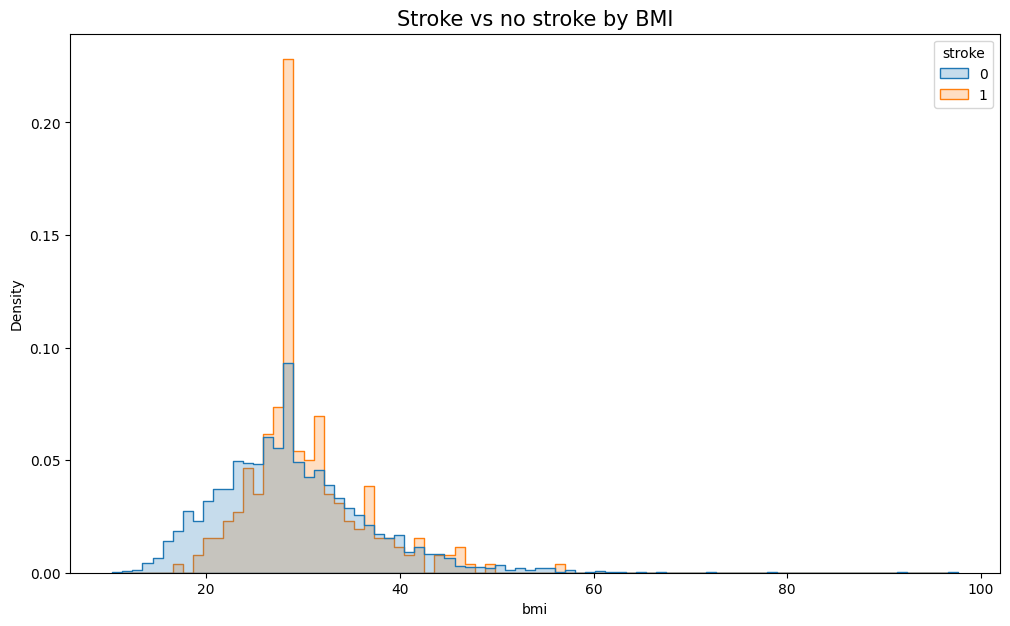

In [12]:
plt.figure(figsize=(12,7))
seaborn.histplot(
    data, x="bmi", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

In [13]:
print(stats.pearsonr(x=data['bmi'],y=data['stroke']))

PearsonRResult(statistic=0.03891685046419615, pvalue=0.005401781842834262)


In [14]:
print(stats.pearsonr(x=data['age'],y=data['stroke']))

PearsonRResult(statistic=0.24523875623198607, pvalue=7.435468822674816e-71)


In [15]:
print(stats.pearsonr(x=data['avg_glucose_level'],y=data['stroke']))

PearsonRResult(statistic=0.13199119156646016, pvalue=2.705302697189168e-21)


In [16]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [17]:
obj_cols=['gender', 'ever_married', 'Residence_type']

lb=LabelEncoder()

for i in obj_cols:
    print(f"Value Counts of column:{i}")
    print(data.loc[:,i].value_counts())
    data[i] = lb.fit_transform(data[i])
    print("The classes which labeled from 0 are: ",lb.classes_,end="\n===========================================\n")

Value Counts of column:gender
Female    2994
Male      2115
Name: gender, dtype: int64
The classes which labeled from 0 are:  ['Female' 'Male']
Value Counts of column:ever_married
Yes    3353
No     1756
Name: ever_married, dtype: int64
The classes which labeled from 0 are:  ['No' 'Yes']
Value Counts of column:Residence_type
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64
The classes which labeled from 0 are:  ['Rural' 'Urban']


In [18]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.60000,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.89456,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.50000,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.40000,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.00000,never smoked,1


In [19]:
print(stats.spearmanr(a=data['gender'],b=data['stroke']))

SpearmanrResult(correlation=0.009080600160079336, pvalue=0.5163958663824182)


In [20]:
print(stats.spearmanr(a=data['ever_married'],b=data['stroke']))

SpearmanrResult(correlation=0.10829931566075394, pvalue=8.367746992154256e-15)


In [21]:
print(stats.spearmanr(a=data['hypertension'],b=data['stroke']))

SpearmanrResult(correlation=0.12789125912919305, pvalue=4.4414725683755856e-20)


In [22]:
print(stats.spearmanr(a=data['heart_disease'],b=data['stroke']))

SpearmanrResult(correlation=0.13490484180042858, pvalue=3.506802133148936e-22)


In [23]:
print(stats.spearmanr(a=data['Residence_type'],b=data['stroke']))

SpearmanrResult(correlation=0.015414584210315819, pvalue=0.2706407299191361)


In [24]:
data = pd.get_dummies(data)

In [25]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.60000,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.89456,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.50000,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.40000,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.00000,1,0,0,0,1,0,0,0,1,0


In [26]:
print(stats.spearmanr(a=data['smoking_status_smokes'],b=data['stroke']))

SpearmanrResult(correlation=0.008920477479368813, pvalue=0.5238200265767476)


# Working with imbalanced data

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
y = data['stroke']
X = data.drop('stroke', axis=1)

In [29]:
stroke = data[data.stroke == 1]
no_stroke = data[data.stroke == 0]
no_stroke_sample = no_stroke.sample(n=208, random_state=42)

final = pd.concat([stroke, no_stroke_sample])

print(stroke.shape[0])
print(no_stroke_sample.shape[0])
print(final.shape[0])

249
208
457


In [30]:
y = final['stroke']
X = final.drop('stroke', axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(365, 18) (92, 18)
(365,) (92,)


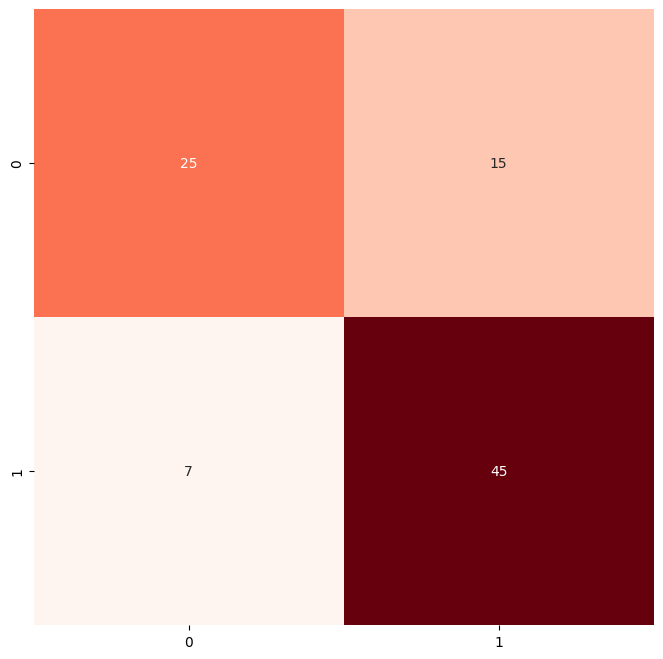

In [32]:
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

lr_conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
seaborn.heatmap(lr_conf_mat, annot=True, fmt='.0f', cmap='Reds', cbar=False)
plt.show()

In [33]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.62      0.69        40
           1       0.75      0.87      0.80        52

    accuracy                           0.76        92
   macro avg       0.77      0.75      0.75        92
weighted avg       0.76      0.76      0.76        92



In [34]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

acc_tree = accuracy_score(y_test, y_pred)

print(f'the accuracy for decision tree is {round(100 * acc_tree, 2)} %')

the accuracy for decision tree is 65.22 %


In [35]:
tree_matrix = confusion_matrix(y_test, y_pred)

upper, lower = tree_matrix
TN, FP = upper
FN, TP = lower

accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = (TP) / (TP + FP)
recall = (TP) / (TP + FN)

print(f'the accuracy is {round(accuracy, 3)}')
print(f'the precision is {round(precision, 3)}')
print(f'the recall is {round(recall, 3)}')

the accuracy is 0.652
the precision is 0.685
the recall is 0.712


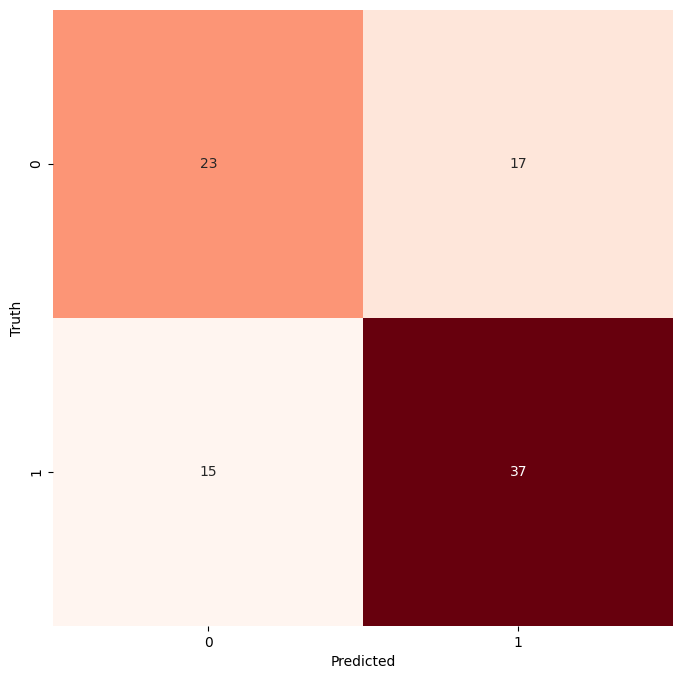

In [36]:
plt.figure(figsize=(8,8))
seaborn.heatmap(tree_matrix, annot=True, cbar=False, fmt='.0f', cmap='Reds')
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.show()

In [37]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.57      0.59        40
           1       0.69      0.71      0.70        52

    accuracy                           0.65        92
   macro avg       0.65      0.64      0.64        92
weighted avg       0.65      0.65      0.65        92



In [38]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_forest = forest.predict(X_test)

acc_forest = accuracy_score(y_test, y_forest)
print(f'the accuracy for the random forest is: {round(100 * acc_forest, 2)}%')

the accuracy for the random forest is: 79.35%


In [39]:
forest_mat = confusion_matrix(y_test, y_forest)

upper, bottom = forest_mat

TN, FP = upper
FN, TP = bottom

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f'the precision of the random forest is {(round(precision, 3))}')
print(f'the recall of the random forest is {(round(recall, 3))}')

the precision of the random forest is 0.77
the recall of the random forest is 0.904


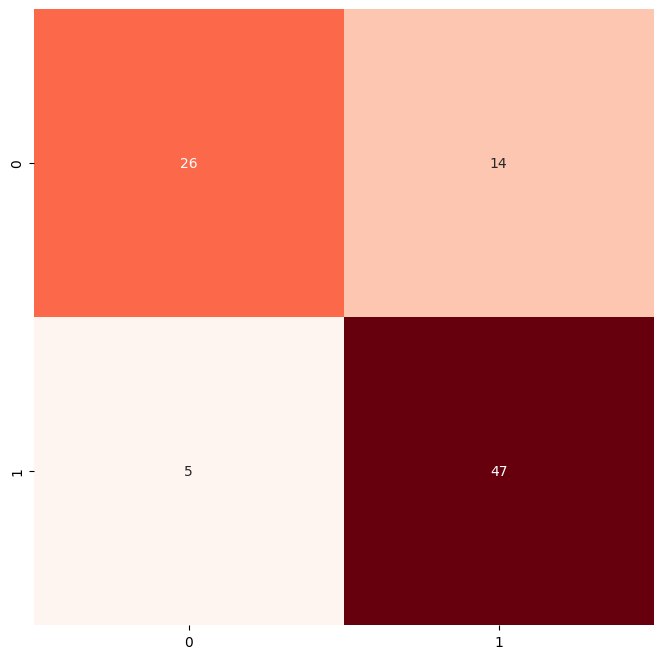

In [40]:
plt.figure(figsize=(8,8))

seaborn.heatmap(forest_mat, annot=True, fmt='.0f', cbar=False, cmap='Reds')

plt.show()

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.05)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [42]:
y_pred_train_xgb = xgb.predict(X_train)
acc_train_xgb = accuracy_score(y_train, y_pred_train_xgb)

y_pred_test_xgb = xgb.predict(X_test)
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

print(acc_train_xgb)
print(acc_test_xgb)

0.9835616438356164
0.7608695652173914


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc
xgb_perc_score = precision_score(y_test, y_pred_test_xgb)
xgb_rec_score= recall_score(y_test, y_pred_test_xgb)
xgb_f1_score = f1_score(y_test, y_pred_test_xgb)

print('Precision: %.3f' %xgb_perc_score )
print('Recall: %.3f' % xgb_rec_score)
print('F-measure: %.3f' % xgb_f1_score)

Precision: 0.750
Recall: 0.865
F-measure: 0.804


# First model with relu activation

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [46]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(18,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=50,
           batch_size=32)

Epoch 1/50
10/10 [==============================] - 1s 17ms/step - loss: 193.6106 - accuracy: 0.4692 - val_loss: 161.1860 - val_accuracy: 0.4384
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 64.8921 - accuracy: 0.4966 - val_loss: 46.7346 - val_accuracy: 0.5616
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 57.2713 - accuracy: 0.4932 - val_loss: 123.8159 - val_accuracy: 0.5616
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 103.1007 - accuracy: 0.5137 - val_loss: 105.6900 - val_accuracy: 0.4384
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 60.5319 - accuracy: 0.5377 - val_loss: 52.4984 - val_accuracy: 0.4521
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 52.4310 - accuracy: 0.5137 - val_loss: 38.2589 - val_accuracy: 0.4384
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 37.4877 - accuracy: 0.5342 - val_loss: 3.5969 - val_accuracy: 0.5616
E

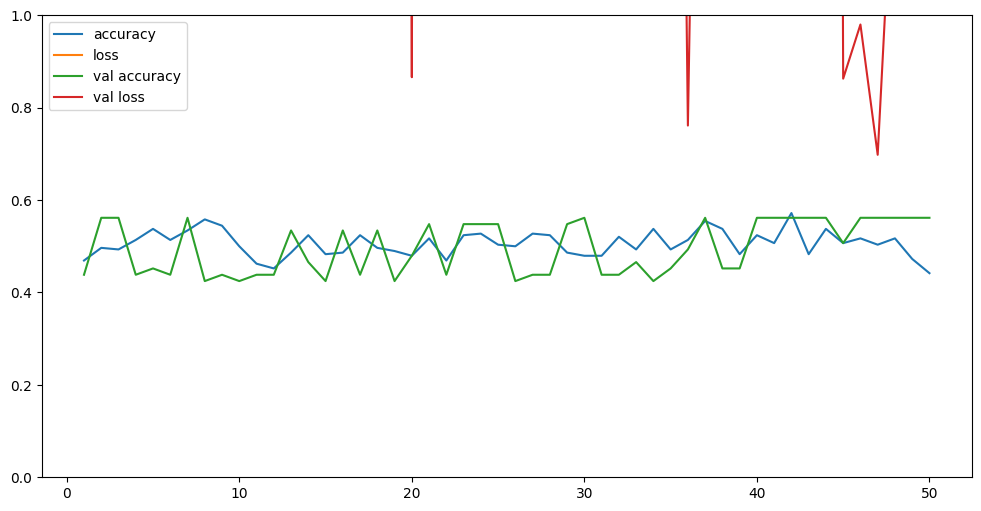

In [48]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

# Second model with leaky relu activation

In [49]:
del model

In [50]:
del history

In [51]:
model = Sequential()
model.add(Dense(32, activation='leaky_relu', input_shape=(18,)))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=50,
           batch_size=32)

Epoch 1/50
10/10 [==============================] - 0s 14ms/step - loss: 224.9812 - accuracy: 0.4829 - val_loss: 184.4968 - val_accuracy: 0.5616
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 132.1068 - accuracy: 0.4726 - val_loss: 67.0580 - val_accuracy: 0.5753
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 101.9972 - accuracy: 0.4795 - val_loss: 100.6378 - val_accuracy: 0.5616
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 82.3375 - accuracy: 0.4795 - val_loss: 123.5664 - val_accuracy: 0.5616
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 83.8183 - accuracy: 0.4966 - val_loss: 82.4995 - val_accuracy: 0.5616
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 48.8646 - accuracy: 0.5000 - val_loss: 24.7820 - val_accuracy: 0.5616
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 46.8204 - accuracy: 0.4452 - val_loss: 40.5179 - val_accuracy: 0.5753

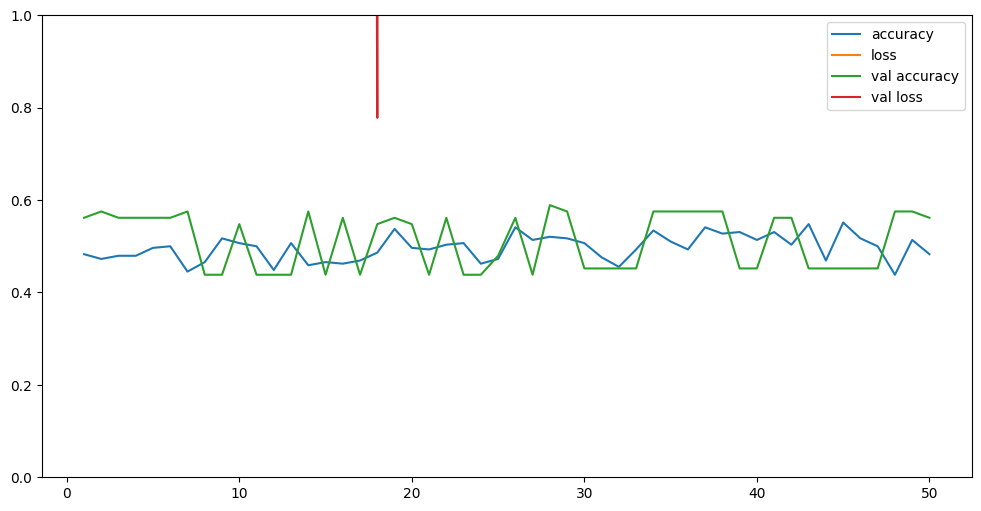

In [53]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

# Third model with dropout

In [54]:
del model
del history

In [55]:
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(18,)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=50,
             batch_size=32)

Epoch 1/50
10/10 [==============================] - 1s 14ms/step - loss: 437.7815 - accuracy: 0.4966 - val_loss: 13.5742 - val_accuracy: 0.4932
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 290.0183 - accuracy: 0.4863 - val_loss: 63.0504 - val_accuracy: 0.4384
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 234.3435 - accuracy: 0.4486 - val_loss: 85.5942 - val_accuracy: 0.4384
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 187.2483 - accuracy: 0.5103 - val_loss: 23.9763 - val_accuracy: 0.4521
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 140.9887 - accuracy: 0.4726 - val_loss: 21.9462 - val_accuracy: 0.4521
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 118.4511 - accuracy: 0.5274 - val_loss: 34.8485 - val_accuracy: 0.5753
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 119.7156 - accuracy: 0.4760 - val_loss: 55.2589 - val_accuracy: 0.561

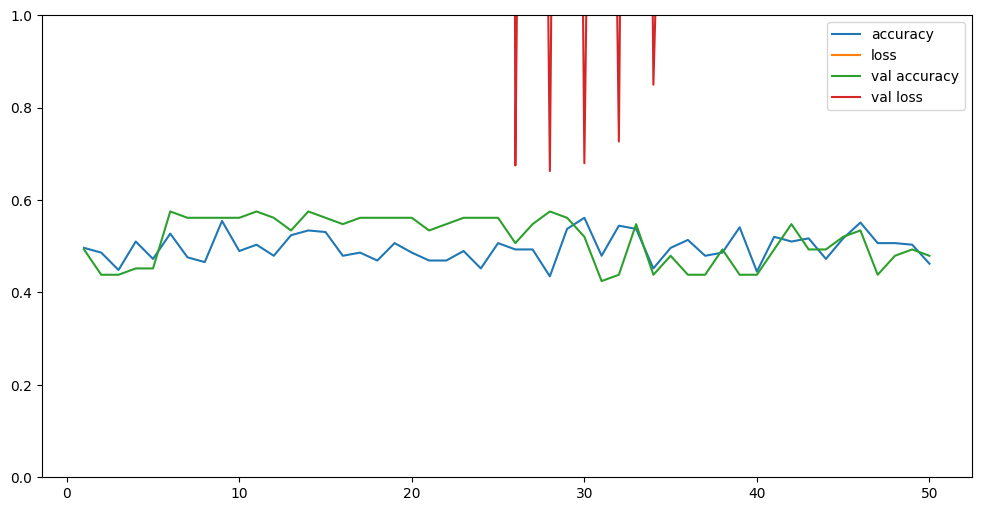

In [57]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

# Data resampling

In [58]:
x = data.drop("stroke" , axis = 1).values
y = data["stroke"]

In [59]:
X_train, X_test, y_train , y_test = train_test_split(x, y, test_size=0.15 , random_state=42)

In [60]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

0    4860
1     249
Name: stroke, dtype: int64


<AxesSubplot: >

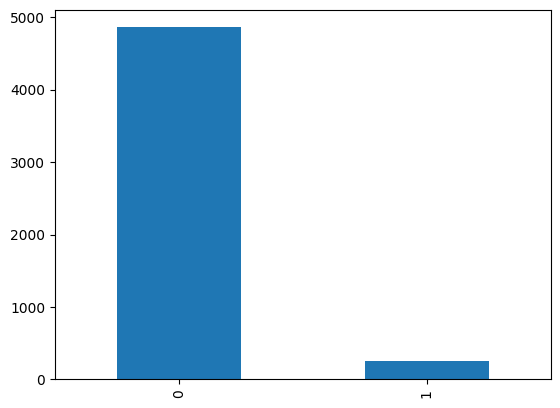

In [61]:
print(data['stroke'].value_counts())
data['stroke'].value_counts().sort_index().plot.bar()

In [62]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train.ravel())

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Trying model 3 again

In [64]:
del model
del history

In [65]:
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(18,)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=50,
             batch_size=32)

Epoch 1/50
207/207 [==============================] - 1s 2ms/step - loss: 0.6419 - accuracy: 0.6167 - val_loss: 0.5356 - val_accuracy: 0.7319
Epoch 2/50
207/207 [==============================] - 0s 1ms/step - loss: 0.5367 - accuracy: 0.7254 - val_loss: 0.4630 - val_accuracy: 0.7820
Epoch 3/50
207/207 [==============================] - 0s 1ms/step - loss: 0.4914 - accuracy: 0.7686 - val_loss: 0.4214 - val_accuracy: 0.8116
Epoch 4/50
207/207 [==============================] - 0s 977us/step - loss: 0.4619 - accuracy: 0.7871 - val_loss: 0.4068 - val_accuracy: 0.8255
Epoch 5/50
207/207 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.7903 - val_loss: 0.3811 - val_accuracy: 0.8321
Epoch 6/50
207/207 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.8074 - val_loss: 0.3720 - val_accuracy: 0.8333
Epoch 7/50
207/207 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8161 - val_loss: 0.3638 - val_accuracy: 0.8448
Epoc

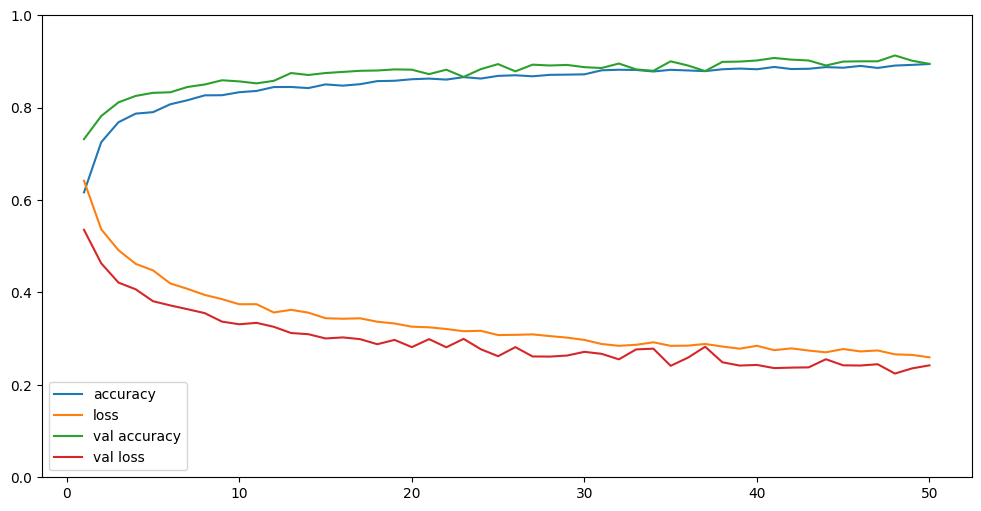

In [67]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [68]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 740us/step - loss: 0.9452 - accuracy: 0.9387


[0.9452054500579834, 0.9387223124504089]

# Trying model 1 again

In [69]:
del model
del history

In [70]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(18,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=50,
             batch_size=32)

Epoch 1/50
207/207 [==============================] - 1s 2ms/step - loss: 0.5208 - accuracy: 0.7511 - val_loss: 0.4161 - val_accuracy: 0.8164
Epoch 2/50
207/207 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.8214 - val_loss: 0.3548 - val_accuracy: 0.8466
Epoch 3/50
207/207 [==============================] - 0s 1ms/step - loss: 0.3549 - accuracy: 0.8463 - val_loss: 0.3386 - val_accuracy: 0.8557
Epoch 4/50
207/207 [==============================] - 0s 986us/step - loss: 0.3228 - accuracy: 0.8635 - val_loss: 0.3029 - val_accuracy: 0.8762
Epoch 5/50
207/207 [==============================] - 0s 967us/step - loss: 0.3029 - accuracy: 0.8712 - val_loss: 0.2845 - val_accuracy: 0.8774
Epoch 6/50
207/207 [==============================] - 0s 952us/step - loss: 0.2781 - accuracy: 0.8869 - val_loss: 0.2671 - val_accuracy: 0.8907
Epoch 7/50
207/207 [==============================] - 0s 957us/step - loss: 0.2529 - accuracy: 0.8976 - val_loss: 0.2631 - val_accuracy: 0.892

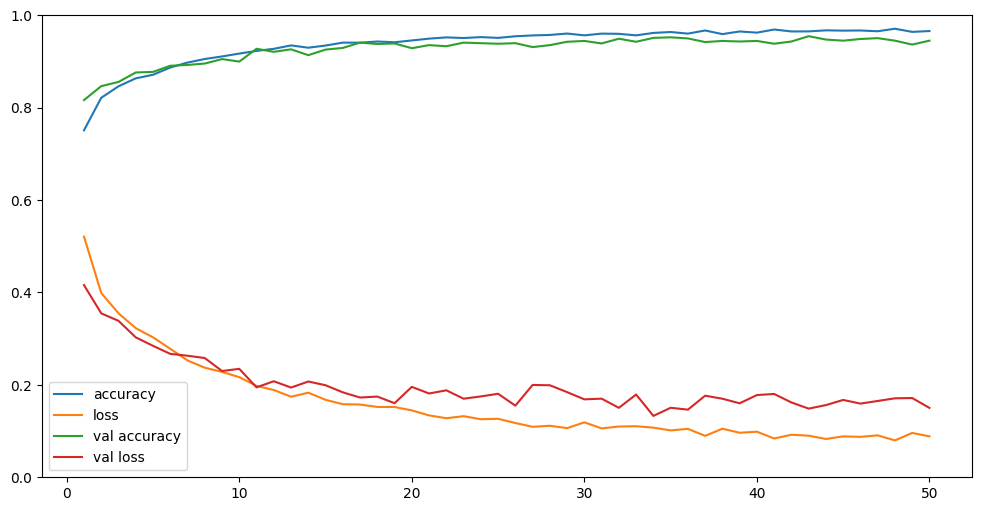

In [72]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [73]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 740us/step - loss: 0.9452 - accuracy: 0.9387


[0.9452054500579834, 0.9387223124504089]

# Trying smaller model

In [74]:
del model

In [75]:
del history

In [76]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(18,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=50,
             batch_size=32)

Epoch 1/50
207/207 [==============================] - 1s 6ms/step - loss: 0.4405 - accuracy: 0.7897 - val_loss: 0.3642 - val_accuracy: 0.8430
Epoch 2/50
207/207 [==============================] - 1s 5ms/step - loss: 0.3487 - accuracy: 0.8495 - val_loss: 0.3005 - val_accuracy: 0.8786
Epoch 3/50
207/207 [==============================] - 1s 5ms/step - loss: 0.3112 - accuracy: 0.8675 - val_loss: 0.2899 - val_accuracy: 0.8835
Epoch 4/50
207/207 [==============================] - 1s 5ms/step - loss: 0.2843 - accuracy: 0.8803 - val_loss: 0.2356 - val_accuracy: 0.9118
Epoch 5/50
207/207 [==============================] - 1s 5ms/step - loss: 0.2525 - accuracy: 0.8948 - val_loss: 0.2550 - val_accuracy: 0.8907
Epoch 6/50
207/207 [==============================] - 1s 5ms/step - loss: 0.2287 - accuracy: 0.9034 - val_loss: 0.2271 - val_accuracy: 0.9143
Epoch 7/50
207/207 [==============================] - 1s 5ms/step - loss: 0.2050 - accuracy: 0.9167 - val_loss: 0.2114 - val_accuracy: 0.9130
Epoch 

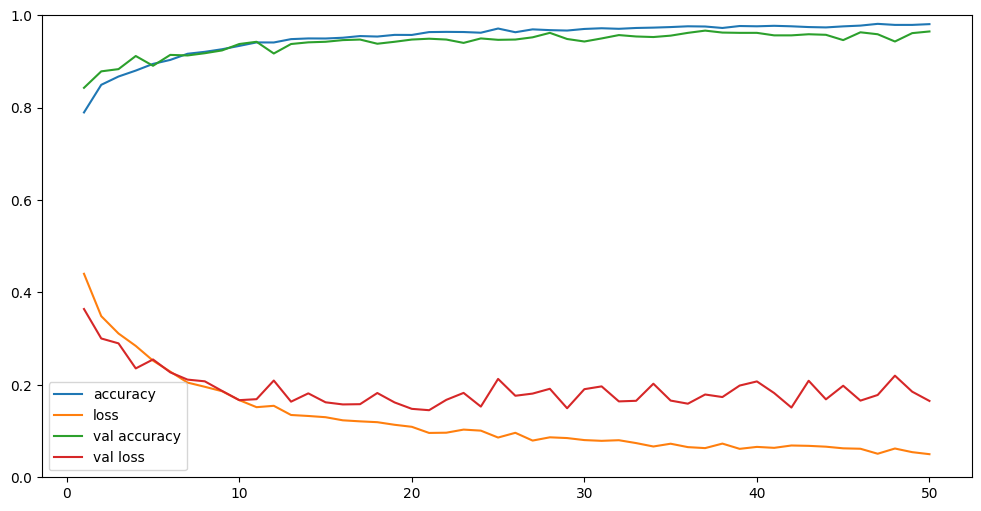

In [78]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [79]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 2ms/step - loss: 0.9452 - accuracy: 0.9387


[0.9452054500579834, 0.9387223124504089]

# optimising

In [80]:
del model
del history

In [81]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(18,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=50,
             batch_size=32)

Epoch 1/50
207/207 [==============================] - 1s 1ms/step - loss: 0.5097 - accuracy: 0.7408 - val_loss: 0.4076 - val_accuracy: 0.8092
Epoch 2/50
207/207 [==============================] - 0s 991us/step - loss: 0.3994 - accuracy: 0.8253 - val_loss: 0.3644 - val_accuracy: 0.8388
Epoch 3/50
207/207 [==============================] - 0s 986us/step - loss: 0.3583 - accuracy: 0.8460 - val_loss: 0.3274 - val_accuracy: 0.8653
Epoch 4/50
207/207 [==============================] - 0s 962us/step - loss: 0.3366 - accuracy: 0.8534 - val_loss: 0.3358 - val_accuracy: 0.8484
Epoch 5/50
207/207 [==============================] - 0s 952us/step - loss: 0.3188 - accuracy: 0.8632 - val_loss: 0.3353 - val_accuracy: 0.8502
Epoch 6/50
207/207 [==============================] - 0s 952us/step - loss: 0.3073 - accuracy: 0.8699 - val_loss: 0.2904 - val_accuracy: 0.8810
Epoch 7/50
207/207 [==============================] - 0s 943us/step - loss: 0.2974 - accuracy: 0.8735 - val_loss: 0.3028 - val_accuracy: 0

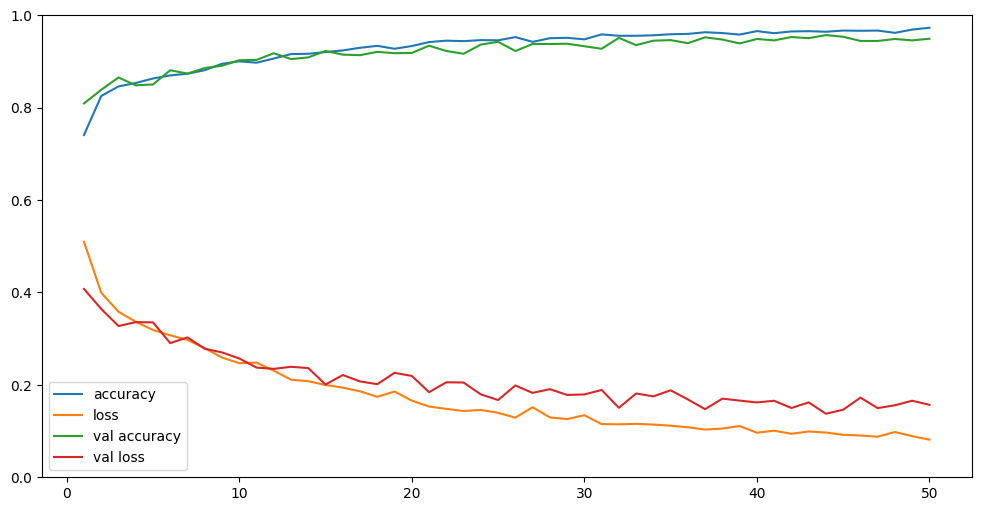

In [83]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [84]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 740us/step - loss: 0.9452 - accuracy: 0.9387


[0.9452054500579834, 0.9387223124504089]

# Trying less layers

In [85]:
del model
del history

In [86]:
model = Sequential()
model.add(Dense(64, activation='leaky_relu', input_shape=(18,)))
model.add(Dense(128, activation='leaky_relu'))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [87]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=75,
             batch_size=32)

Epoch 1/75
207/207 [==============================] - 1s 1ms/step - loss: 0.4992 - accuracy: 0.7622 - val_loss: 0.4128 - val_accuracy: 0.8267
Epoch 2/75
207/207 [==============================] - 0s 962us/step - loss: 0.4077 - accuracy: 0.8187 - val_loss: 0.3795 - val_accuracy: 0.8382
Epoch 3/75
207/207 [==============================] - 0s 1ms/step - loss: 0.3710 - accuracy: 0.8373 - val_loss: 0.3603 - val_accuracy: 0.8436
Epoch 4/75
207/207 [==============================] - 0s 1ms/step - loss: 0.3474 - accuracy: 0.8498 - val_loss: 0.3478 - val_accuracy: 0.8575
Epoch 5/75
207/207 [==============================] - 0s 957us/step - loss: 0.3393 - accuracy: 0.8539 - val_loss: 0.3446 - val_accuracy: 0.8502
Epoch 6/75
207/207 [==============================] - 0s 943us/step - loss: 0.3141 - accuracy: 0.8681 - val_loss: 0.3342 - val_accuracy: 0.8617
Epoch 7/75
207/207 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.8703 - val_loss: 0.2899 - val_accuracy: 0.8841


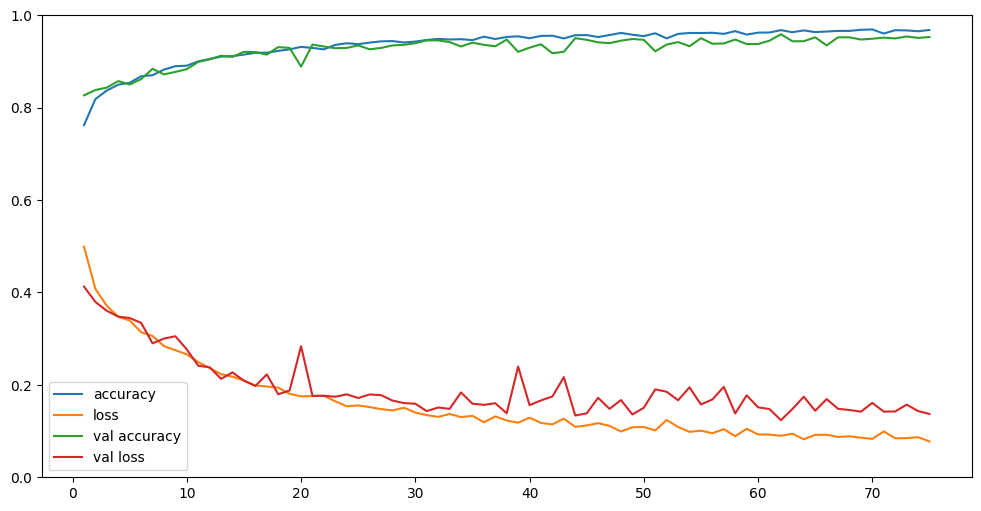

In [88]:
n_epoch = range(1,76)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

# Logistic Regression and Random Forest with BMI as only feature

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [90]:
y = data['stroke']
X = np.array(data['bmi']).reshape(-1, 1)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4087, 1) (1022, 1)
(4087,) (1022,)


In [92]:
oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

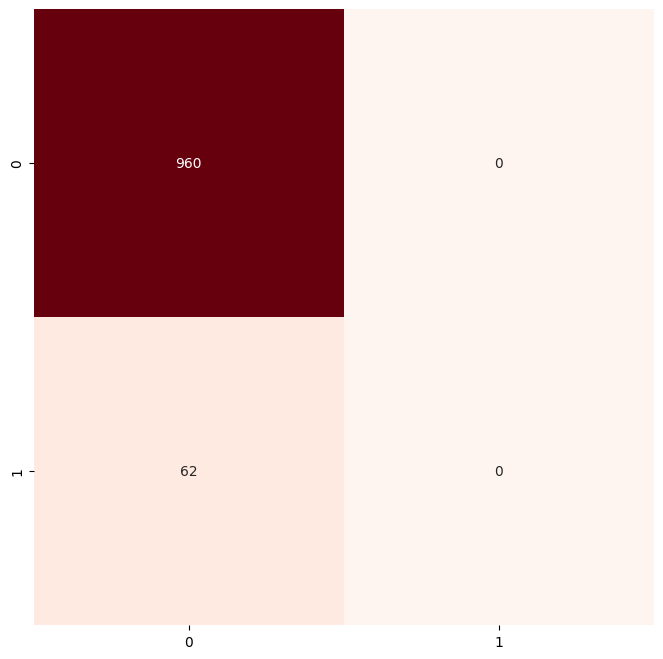

In [93]:
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train, y_train)

y_pred_l = logreg.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred_l)

plt.figure(figsize=(8,8))
seaborn.heatmap(conf_mat, annot=True, fmt='.0f', cmap='Reds', cbar=False)
plt.show()

In [94]:
report = classification_report(y_test, y_pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\Peter\Documents\Workspace\aai\aai-mandatory-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Peter\Documents\Workspace\aai\aai-mandatory-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Peter\Documents\Workspace\aai\aai-mandatory-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [95]:
print(accuracy_score(y_test, y_pred_l))

0.9393346379647749


In [96]:
oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

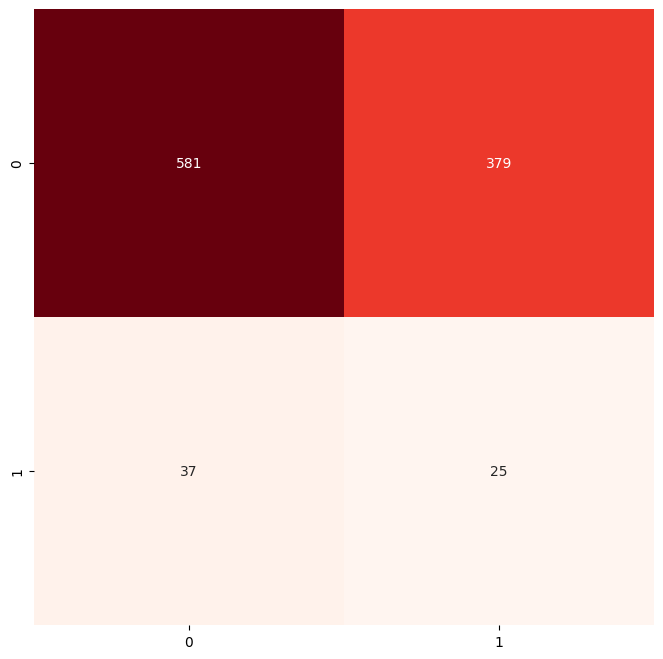

In [97]:
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train_resh, y_train_resh)

y_pred_l = logreg.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred_l)

plt.figure(figsize=(8,8))
seaborn.heatmap(conf_mat, annot=True, fmt='.0f', cmap='Reds', cbar=False)
plt.show()

In [98]:
report = classification_report(y_test, y_pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.61      0.74       960
           1       0.06      0.40      0.11        62

    accuracy                           0.59      1022
   macro avg       0.50      0.50      0.42      1022
weighted avg       0.89      0.59      0.70      1022



In [99]:
print(accuracy_score(y_test, y_pred_l))

0.5929549902152642


In [100]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_forest = forest.predict(X_test)

acc_forest = accuracy_score(y_test, y_forest)
print(f'the accuracy for the random forest is: {round(100 * acc_forest, 2)}%')

the accuracy for the random forest is: 93.74%


In [101]:
forest_mat = confusion_matrix(y_test, y_forest)

upper, bottom = forest_mat

TN, FP = upper
FN, TP = bottom

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f'the precision of the random forest is {(round(precision, 3))}')
print(f'the recall of the random forest is {(round(recall, 3))}')

the precision of the random forest is 0.25
the recall of the random forest is 0.016


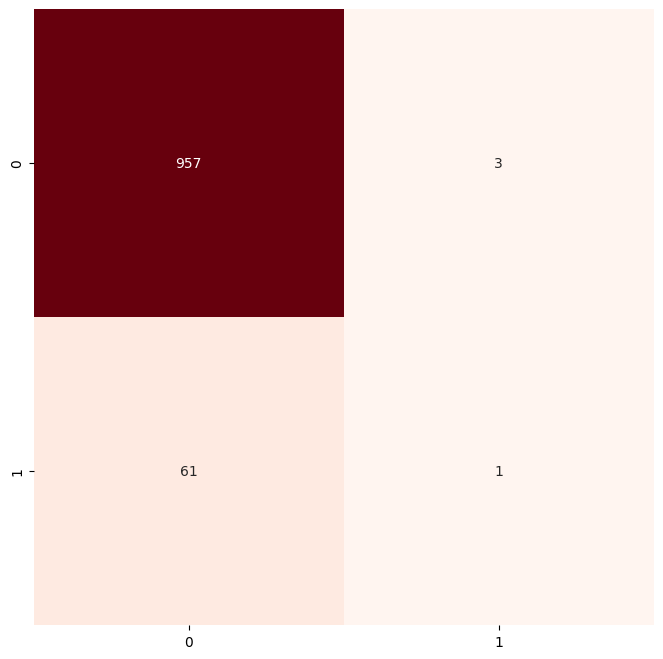

In [102]:
plt.figure(figsize=(8,8))

seaborn.heatmap(forest_mat, annot=True, fmt='.0f', cbar=False, cmap='Reds')

plt.show()

In [103]:
report = classification_report(y_test, y_forest)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.25      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.60      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022



In [104]:
forest = RandomForestClassifier()
forest.fit(X_train_resh, y_train_resh)

y_forest = forest.predict(X_test)

acc_forest = accuracy_score(y_test, y_forest)
print(f'the accuracy for the random forest is: {round(100 * acc_forest, 2)}%')

the accuracy for the random forest is: 85.42%


In [105]:
forest_mat = confusion_matrix(y_test, y_forest)

upper, bottom = forest_mat

TN, FP = upper
FN, TP = bottom

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f'the precision of the random forest is {(round(precision, 3))}')
print(f'the recall of the random forest is {(round(recall, 3))}')

the precision of the random forest is 0.128
the recall of the random forest is 0.242


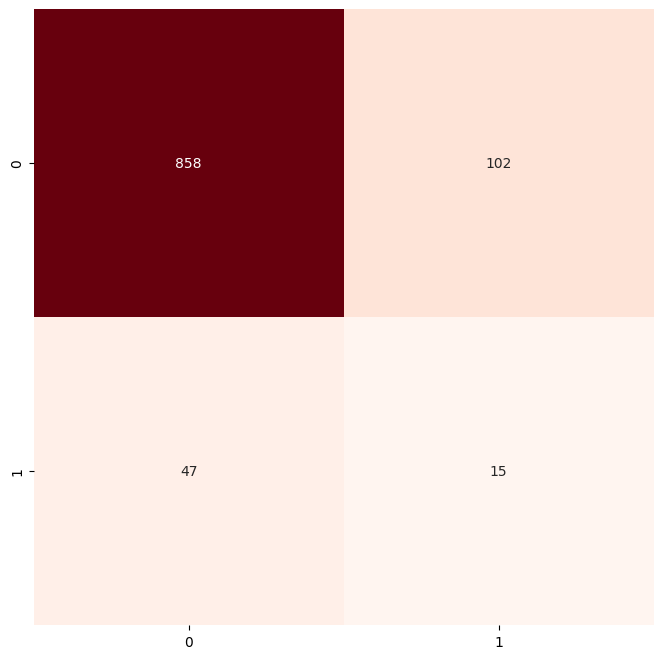

In [106]:
plt.figure(figsize=(8,8))

seaborn.heatmap(forest_mat, annot=True, fmt='.0f', cbar=False, cmap='Reds')

plt.show()

In [107]:
report = classification_report(y_test, y_forest)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       960
           1       0.13      0.24      0.17        62

    accuracy                           0.85      1022
   macro avg       0.54      0.57      0.54      1022
weighted avg       0.90      0.85      0.87      1022



# Deep Neural Network with BMI as the only feature

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [109]:
X_train, X_val, y_train, y_val = train_test_split(X_train_resh, y_train_resh, test_size=0.2, random_state=42)

In [110]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(1,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [111]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=25,
             batch_size=32)

Epoch 1/25
195/195 [==============================] - 1s 2ms/step - loss: 0.7022 - accuracy: 0.5063 - val_loss: 0.6973 - val_accuracy: 0.5115
Epoch 2/25
195/195 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5212 - val_loss: 0.6975 - val_accuracy: 0.4936
Epoch 3/25
195/195 [==============================] - 0s 970us/step - loss: 0.6937 - accuracy: 0.5272 - val_loss: 0.6946 - val_accuracy: 0.5160
Epoch 4/25
195/195 [==============================] - 0s 939us/step - loss: 0.6920 - accuracy: 0.5362 - val_loss: 0.6925 - val_accuracy: 0.5603
Epoch 5/25
195/195 [==============================] - 0s 960us/step - loss: 0.6920 - accuracy: 0.5325 - val_loss: 0.6909 - val_accuracy: 0.5013
Epoch 6/25
195/195 [==============================] - 0s 939us/step - loss: 0.6911 - accuracy: 0.5452 - val_loss: 0.6911 - val_accuracy: 0.5763
Epoch 7/25
195/195 [==============================] - 0s 934us/step - loss: 0.6902 - accuracy: 0.5460 - val_loss: 0.6896 - val_accuracy: 0.4

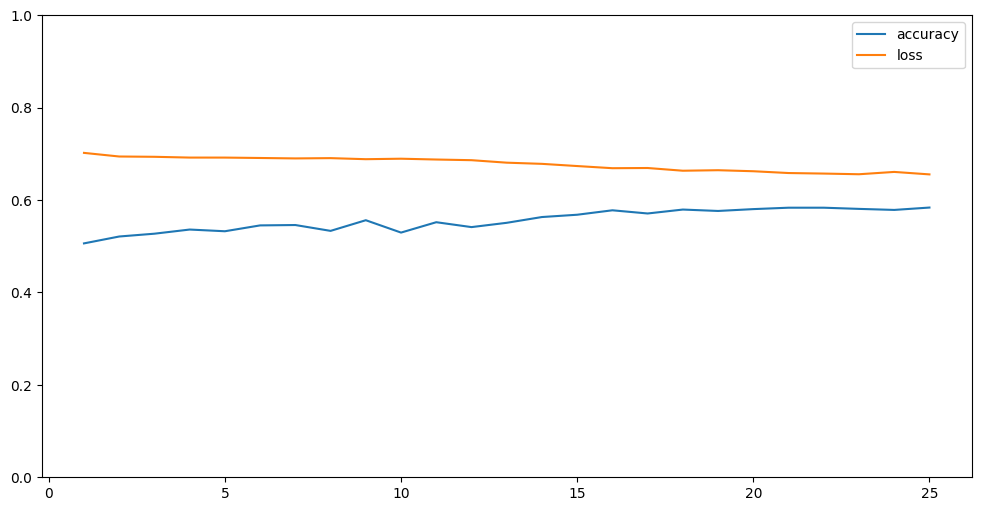

In [112]:
n_epoch = range(1,26)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [113]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 710us/step - loss: 0.6427 - accuracy: 0.4560


[0.6426559686660767, 0.4559686779975891]

In [114]:
del model
del history

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [116]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [117]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(1,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [118]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=25,
             batch_size=32)

Epoch 1/25
156/156 [==============================] - 1s 2ms/step - loss: 0.7025 - accuracy: 0.4988 - val_loss: 0.6982 - val_accuracy: 0.5040
Epoch 2/25
156/156 [==============================] - 0s 956us/step - loss: 0.6949 - accuracy: 0.5078 - val_loss: 0.6928 - val_accuracy: 0.5016
Epoch 3/25
156/156 [==============================] - 0s 969us/step - loss: 0.6925 - accuracy: 0.5369 - val_loss: 0.6912 - val_accuracy: 0.5585
Epoch 4/25
156/156 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5355 - val_loss: 0.6915 - val_accuracy: 0.4944
Epoch 5/25
156/156 [==============================] - 0s 956us/step - loss: 0.6913 - accuracy: 0.5379 - val_loss: 0.6917 - val_accuracy: 0.5625
Epoch 6/25
156/156 [==============================] - 0s 969us/step - loss: 0.6907 - accuracy: 0.5497 - val_loss: 0.6907 - val_accuracy: 0.5753
Epoch 7/25
156/156 [==============================] - 0s 969us/step - loss: 0.6918 - accuracy: 0.5373 - val_loss: 0.6934 - val_accuracy: 0.5

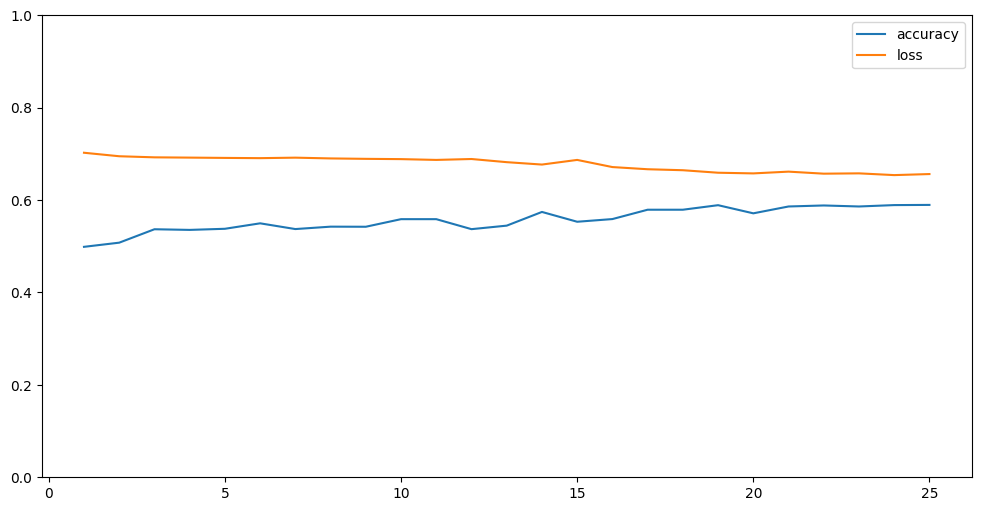

In [119]:
n_epoch = range(1,26)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [120]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 807us/step - loss: 0.6930 - accuracy: 0.4061


[0.6929895877838135, 0.40606653690338135]